<h1 style="color: #00BFFF;">00 | Import Libraries</h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Basic Libraries
import os
import json
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Computer Vision
import tensorflow as tf
from tensorflow.keras.models import load_model

# Machine Learning
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

<h1 style="color: #00BFFF;">05 | Evaluating and Visualizing Results</h1>

In [3]:
# Load the saved dataset for MobileNet
test_dataset = tf.data.Dataset.load('/content/drive/MyDrive/IRONHACK/W8/computer_vision_project/data/tensor_dataset/test_dataset')

In [4]:
# Load the saved dataset
test_dataset_mobilenet = tf.data.Dataset.load('/content/drive/MyDrive/IRONHACK/W8/computer_vision_project/data/tensor_dataset/test_dataset_mobilenet')

In [5]:
# Load the fine-tuned best model
mobilenet_model = load_model('/content/drive/MyDrive/IRONHACK/W8/computer_vision_project/models/best_model_mobilenet.keras')

In [6]:
# Load the fine-tuned best model
resnet_model = load_model('/content/drive/MyDrive/IRONHACK/W8/computer_vision_project/models/best_model_resnet.keras')

In [7]:
# Load the fine-tuned best model
fine_tuned_model = load_model('/content/drive/MyDrive/IRONHACK/W8/computer_vision_project/models/fine_tuned_model.keras')

In [8]:
class_names = ['fractured', 'not fractured']

In [9]:
def plot_confusion_matrix(y_true, y_pred, class_names):
  # Compute confusion a
  conf_matrix = confusion_matrix(y_true, y_pred)
  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

<h2 style="color: #008080;">MobileNetV2 Basemodel</h2>

In [10]:
# Evaluate the fine-tuned model on the test dataset
test_loss_mn, test_accuracy_mn = mobilenet_model.evaluate(test_dataset_mobilenet)

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8584 - loss: 0.3476


In [11]:
y_true_mn = []
y_pred_mn = []

for X, labels in test_dataset_mobilenet:
    preds = mobilenet_model.predict(X).flatten()
    bin_preds = (preds > 0.5).astype("int32")

    y_true_mn.extend(labels.numpy())
    y_pred_mn.extend(bin_preds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 929ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step


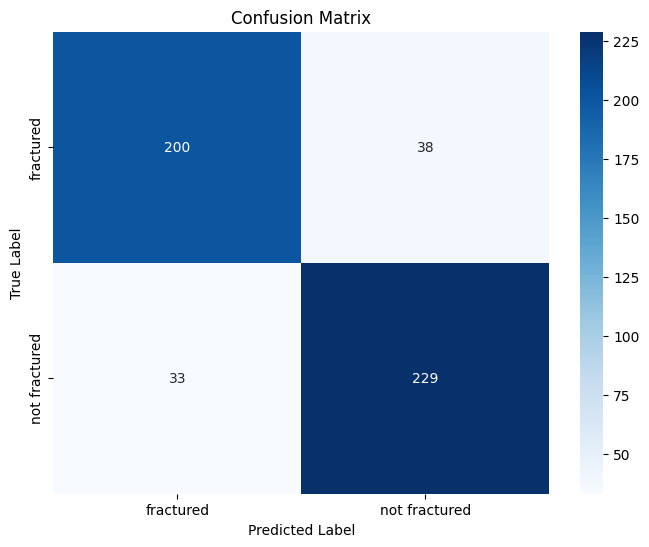

In [12]:
plot_confusion_matrix(y_true_mn, y_pred_mn, class_names)

In [13]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_mn, y_pred_mn, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

    fractured       0.86      0.84      0.85       238
not fractured       0.86      0.87      0.87       262

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500



<h2 style="color: #008080;">ResNet50 Basemodel</h2>

In [14]:
# Evaluate the fine-tuned model on the test dataset
test_loss_rn, test_accuracy_rn = resnet_model.evaluate(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 101s 12s/step - accuracy: 0.9753 - loss: 0.0778


In [15]:
y_true_rn = []
y_pred_rn = []

for X, labels in test_dataset:
    preds = resnet_model.predict(X).flatten()
    bin_preds = (preds > 0.5).astype("int32")

    y_true_rn.extend(labels.numpy())
    y_pred_rn.extend(bin_preds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 7s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 7s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step


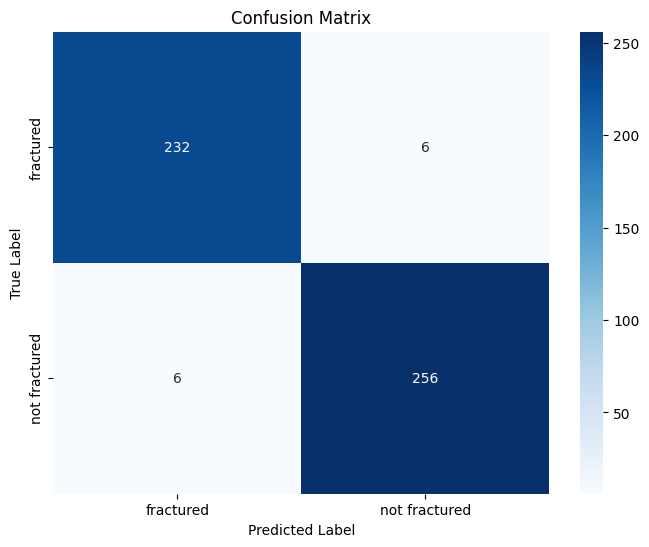

In [16]:
plot_confusion_matrix(y_true_rn, y_pred_rn, class_names)

In [17]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_rn, y_pred_rn, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

    fractured       0.97      0.97      0.97       238
not fractured       0.98      0.98      0.98       262

     accuracy                           0.98       500
    macro avg       0.98      0.98      0.98       500
 weighted avg       0.98      0.98      0.98       500



<h2 style="color: #008080;">Best model: ResNet50 Fine Tuned</h2>

In [18]:
# Evaluate the fine-tuned model on the test dataset
test_loss_ft, test_accuracy_ft = fine_tuned_model.evaluate(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 103s 12s/step - accuracy: 0.9708 - loss: 0.0665


In [19]:
y_true_ft = []
y_pred_ft = []

for X, labels in test_dataset:
    preds = fine_tuned_model.predict(X).flatten()
    bin_preds = (preds > 0.5).astype("int32")

    y_true_ft.extend(labels.numpy())
    y_pred_ft.extend(bin_preds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 7s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


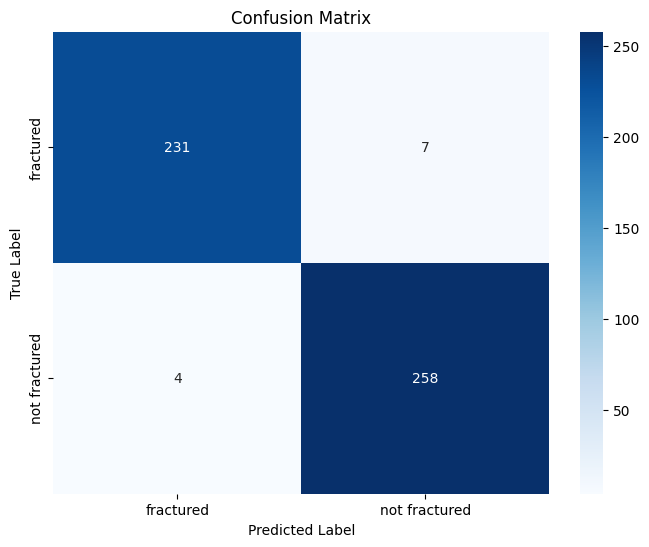

In [20]:
plot_confusion_matrix(y_true_ft, y_pred_ft, class_names)

In [21]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_ft, y_pred_ft, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

    fractured       0.98      0.97      0.98       238
not fractured       0.97      0.98      0.98       262

     accuracy                           0.98       500
    macro avg       0.98      0.98      0.98       500
 weighted avg       0.98      0.98      0.98       500



In [22]:
# Get a batch of test data
image_batch, label_batch = test_dataset.as_numpy_iterator().next()

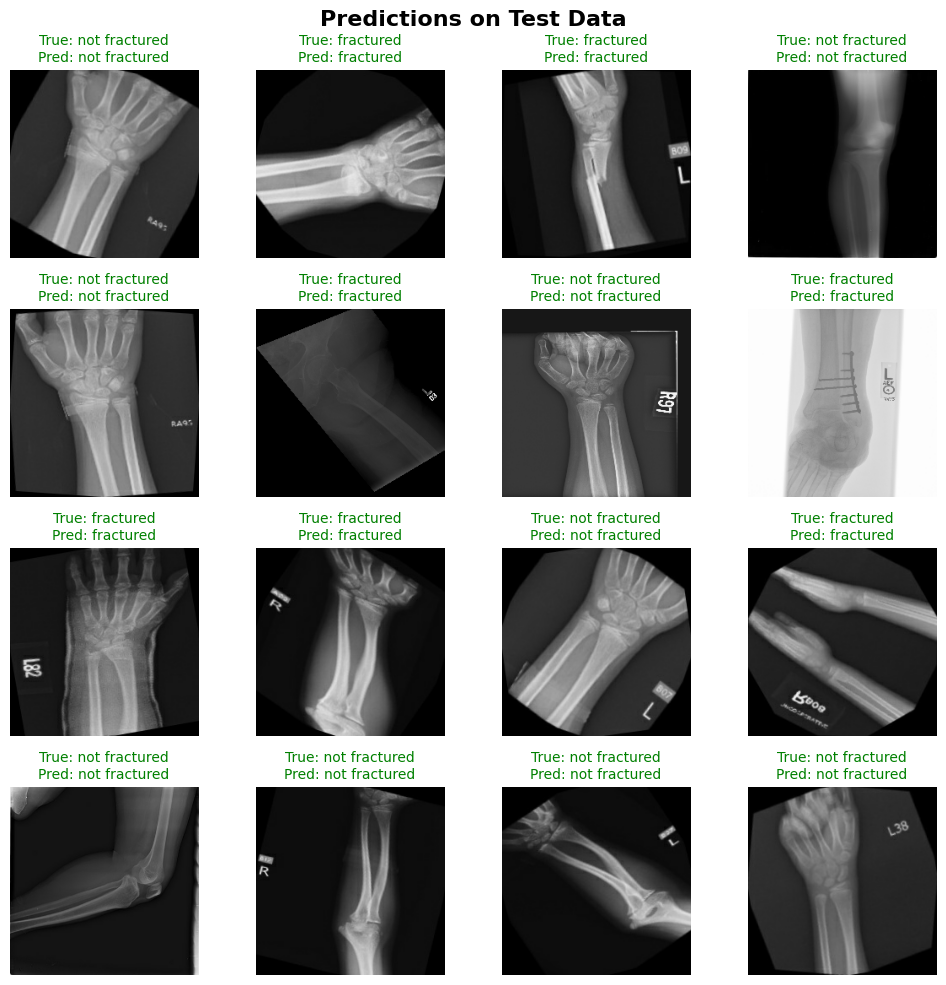

In [23]:
# Generate predictions
predictions = fine_tuned_model.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions < 0.5, 0, 1).numpy()  # Apply threshold for binary classification

# Visualize predictions
plt.figure(figsize=(10, 10))
for i in range(16):  # Increase the number of images to 16
    ax = plt.subplot(4, 4, i + 1)  # Adjust the grid to 4x4
    plt.imshow(image_batch[i].astype("uint8"))
    true_label = label_batch[i]
    pred_label = predictions[i]
    title = f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}"
    color = 'green' if true_label == pred_label else 'red'
    plt.title(title, color=color, fontsize=10)  # Make the font size smaller
    plt.axis("off")
plt.suptitle("Predictions on Test Data", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()